# Лабораторная работа №4.
## Реализация приложения по распознаванию номеров домов.


### Данные
Набор изображений из Google Street View с изображениями номеров домов, содержащий 10 классов, соответствующих цифрам от 0 до 9. 

73257 изображений цифр в обучающей выборке; 

26032 изображения цифр в тестовой выборке;

531131 изображения, которые можно использовать как дополнение к обучающей выборке; 

В двух форматах: 
    - Оригинальные изображения с выделенными цифрами; 
    - Изображения размером 32 × 32, содержащих одну цифру;
   
Данные первого формата можно скачать по ссылкам: 
    - http://ufldl.stanford.edu/housenumbers/train.tar.gz (обучающая выборка); 
    - http://ufldl.stanford.edu/housenumbers/test.tar.gz (тестовая выборка); 
    - http://ufldl.stanford.edu/housenumbers/extra.tar.gz (дополнительные данные); 

Данные второго формата можно скачать по ссылкам: 
    - http://ufldl.stanford.edu/housenumbers/train_32x32.mat (обучающая выборка); 
    - http://ufldl.stanford.edu/housenumbers/test_32x32.mat (тестовая выборка); 
    - http://ufldl.stanford.edu/housenumbers/extra_32x32.mat (дополнительные данные); 
    
Описание данных на английском языке доступно по ссылке: 
    - http://ufldl.stanford.edu/housenumbers/


### Задания
- [ ] Реализуйте глубокую нейронную сеть (полносвязную или сверточную) и обучите ее на синтетических данных (например, наборы MNIST (http://yann.lecun.com/exdb/mnist/) или notMNIST). Ознакомьтесь с имеющимися работами по данной тематике: англоязычная статья (http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/42241.pdf), видео на YouTube (https://www.youtube.com/watch?v=vGPI_JvLoN0).
- [ ] После уточнения модели на синтетических данных попробуйте обучить ее на реальных данных (набор Google Street View). Что изменилось в модели?
- [ ] Сделайте множество снимков изображений номеров домов с помощью смартфона на ОС Android. Также можно использовать библиотеки OpenCV, Simple CV или Pygame для обработки изображений с общедоступных камер видеонаблюдения (например, https://www.earthcam.com/). Пример использования библиотеки TensorFlow на смартфоне можете воспользоваться демонстрационным приложением от Google (https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/android).
- [ ] Реализуйте приложение для ОС Android, которое может распознавать цифры в номерах домов, используя разработанный ранее классификатор. Какова доля правильных классификаций?

In [19]:
%%time

import numpy as np
import pandas as pd
import tensorflow as tf

img_rows, img_cols = 28, 28

# Read MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')
m_train, m_test = x_train.shape[0], x_test.shape[0]

# Add channel dimention
if tf.keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(m_train, 1, img_rows, img_cols)
    x_test = x_test.reshape(m_test, 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(m_train, img_rows, img_cols, 1)
    x_test = x_test.reshape(m_test, img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

    
print(f'Train shape  {x_test.shape}')
print(f'Test shape   {x_train.shape}')

Train shape  (10000, 28, 28, 1)
Test shape   (60000, 28, 28, 1)
CPU times: user 241 ms, sys: 25 ms, total: 266 ms
Wall time: 268 ms


In [22]:
%%time 

import tensorflow as tf


model = tf.keras.models.Sequential([
    # CONV 01
    tf.keras.layers.Conv2D(
        filters=6, kernel_size=5, strides=1, 
        activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPool2D(
        pool_size=(2, 2), strides=2, padding='valid'),

    # CONV 02
    tf.keras.layers.Conv2D(
        filters=16, kernel_size=5, strides=1, 
        activation='relu'),
    tf.keras.layers.MaxPool2D(
        pool_size=(2, 2), strides=2, padding='valid'),
    tf.keras.layers.Flatten(),
    
    # FC 03
    tf.keras.layers.Dense(
        units=120, activation='relu'),
    
    # FC 04
    tf.keras.layers.Dense(
        units=84, activation='relu'),
    
    # Y
    tf.keras.layers.Dense(10, activation='softmax'),
])


model.compile(
    optimizer='Adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
CPU times: user 162 ms, sys: 18.9 ms, total: 181 ms
Wall time: 204 ms


In [23]:
%%time 

model.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 31s 512us/sample - loss: 0.3655 - acc: 0.9213 - val_loss: 0.0821 - val_acc: 0.9753
Epoch 2/10
60000/60000 [==============================] - 30s 495us/sample - loss: 0.0837 - acc: 0.9750 - val_loss: 0.0676 - val_acc: 0.9792
Epoch 3/10
60000/60000 [==============================] - 29s 479us/sample - loss: 0.0647 - acc: 0.9804 - val_loss: 0.0527 - val_acc: 0.9829
Epoch 4/10
60000/60000 [==============================] - 33s 548us/sample - loss: 0.0562 - acc: 0.9831 - val_loss: 0.0515 - val_acc: 0.9837
Epoch 5/10
60000/60000 [==============================] - 49s 823us/sample - loss: 0.0483 - acc: 0.9853 - val_loss: 0.0836 - val_acc: 0.9749
Epoch 6/10
60000/60000 [==============================] - 29s 478us/sample - loss: 0.0415 - acc: 0.9867 - val_loss: 0.0532 - val_acc: 0.9851
Epoch 7/10
60000/60000 [==============================] - 27s 442us/sample - loss: 0.0385 - acc: 0.9884 

In [25]:
%%time

model.save_weights('checkpoints/04/mnist_001')

In [97]:
%%time

import numpy as np
import scipy.io
import tensorflow as tf


img_rows, img_cols = 32, 32

# Read 32x32 TRAIN data
matdata = scipy.io.loadmat('data/housenumbers/train_32x32.mat')
x_train = matdata['X'].T
y_train = matdata['y']

# Fix dimentions
m, c, w, h = x_train.shape
if tf.keras.backend.image_data_format() != 'channels_first':
    x_train = np.moveaxis(x_train, 1, 3)
    x_train = np.moveaxis(x_train, 1, 2)
y_train = y_train.reshape(m, 1)


# Read 32x32 TEST data
matdata = scipy.io.loadmat('data/housenumbers/test_32x32.mat')
x_test = matdata['X'].T
y_test = matdata['y']

# Fix dimentions
m, c, w, h = x_test.shape
if tf.keras.backend.image_data_format() != 'channels_first':
    x_test = np.moveaxis(x_test, 1, 3)
    x_test = np.moveaxis(x_test, 1, 2)
y_test = y_test.reshape(m, 1)

print(f'Train shape  {x_train.shape}')
print(f'Test shape   {x_test.shape}')

Train shape  (73257, 32, 32, 3)
Test shape   (26032, 32, 32, 3)
CPU times: user 1.83 s, sys: 117 ms, total: 1.95 s
Wall time: 1.95 s


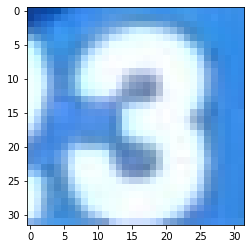

In [134]:
from enum import Enum

class ImageryType(str, Enum):
    GEOTIFF = "nadir"
    ORTHOMOSAIC = "dsm-ortho"
    DSM = "dsm"
    DTM = "dtm"
    DTMORTHO = "dtm-ortho"

In [137]:
ImageryType['GEOTIFF']

<ImageryType.GEOTIFF: 'nadir'>